<a href="https://colab.research.google.com/github/worldbank/dec-python-course/blob/update-session-3/1-foundations/3-numpy-and-pandas/foundations-s3-bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEC Foundations of Python for Data Science - Session 3 Bonus Material

This notebook contains only the **BONUS material** for Session 3. The main material is [here](https://colab.research.google.com/github/worldbank/dec-python-course/blob/main/1-foundations/3-numpy-and-pandas/foundations-s3.ipynb).

# 1.Python Library Extras

## How to upgrade a library?

Sometimes you find yourself needing the functionalities or bug fixes provided by the latest version of a library. The notebook environment may not have the latest version installed.

In [ ]:
# install/upgrade to the latest stable verison of a package
# Click on "RESTART RUNTIME" if you see the button
!pip install pandas --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.5.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


## How to install a specific version of a library?

Sometimes a specific version of a library is called for due to reasons such as dependency requirement.

In [ ]:
# install a specific version of a package
!pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pandas-1.3.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3


## 1.5. Exercises: install and use matplotlib
The following exercises are meant to be completed step by step. Upon successful completion of all steps, the last cell should execute without any `AssertionError` or the prompt "Remove this line after filling in your own code".

### Step 1. 

Run a command to find out what is the current installed version of `matplotlib`:

In [ ]:
# hint: use ! and bash command `pip freeze` and pipe the results to bash command `grep matplotlib`

### Step 2. 

Install version 3.5.2 of `matplotlib` for this notebook. Upon successful installation, click on "RESTART RUNTIME" in the code cell output.

In [ ]:
# hint: use ! and bash command `pip install`

### Step 3.

Import `matplotlib`'s `pyplot` module and alias it as `plt`

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use `import ... as ...`

# === Do not modify code below ===
fig = plt.figure(figsize=(10, 80))
assert hasattr(fig, "subfigures"),\
 "If correct version of matplotlib were installed you should not see this message"

print("Well done!")

Remove this line after filling in your own code


## Python Library Versioning

If you want to lock/control the versions of all packages used by your script (aka. dependencies), you can put them in a `requirements.txt` file in the format of `package_name==package_version` one package per line, then instruct pip to install the dependences in the `requirements.txt` file with bash command `pip install -r requirements.txt`. Using `requirements.txt` for dependency management is a very common practice in python projects.

### Exercises
The following exercises are meant to be completed step by step. Upon successful completion of all steps, the last cell should execute without any `AssertionError`.
1. Git clone this course repository from github: https://github.com/worldbank/dec-python-course

In [ ]:
# hint: use ! and bash command `git clone`

2. Change your working directory to the folder where this file is in `
dec-python-course/1-foundations/3-numpy-and-pandas/`

In [ ]:
# hint: use % and bash command `cd`

3. Install all python libraries as specified in `requirements.txt`, without copying the content of `requirements.txt`. Upon successful installation, click on "RESTART RUNTIME" in the code cell output.

In [ ]:
# hint: use ! and bash command `pip install` with flag `-r`

4. Import `matplotlib`'s `pyplot` module and alias it as `plt`

In [ ]:
%%script echo Remove this line after filling in your own code
# hint: use `import ... as ...`

# === Do not modify code below ===
fig = plt.figure(figsize=(10, 80))
assert hasattr(fig, "subfigures"),\
 "If correct version of matplotlib were installed you should not see this message"

print("Well done!")

Remove this line after filling in your own code


# 2.NumPy Extras

### How does a NumPy `ndarray` compare to a Python `array`?
In Python, arrays are most often represented using `list`, which allows for different data types within a single list. (For a refresher on lists, see Session 1 of this course, "Container types - Lists" section). Python standard library does come with its own `array` module which requires that a single array can only contain one data type of elements. Python's `array` is more compact (takes less space in storage) than `list` and comes with some basic math operations. NumPy's `ndarray` is like Python's `array` on steroids, functionality wise.

In [ ]:
from array import array
import numpy as np

py_list = [1, 2, '3']
py_array = array('i', [1, 2, 3]) # i indicates integer
np_array = np.array([1, 2, 3])

In [ ]:
import numpy as np

one_d_array = np.arange(4)
two_d_array = np.array([[1, 2], [3, 4]])

## How to create an ndarray with skip-sequential numbers?

In [ ]:
# start, stop, step
np.arange(1, 9, 2)

array([1, 3, 5, 7])

## How to create a 3D ndarray?

In [ ]:
# 3-D array
three_d_array = np.array([[[1.0, 2], [4, 3], [7, 4]],
                          [[2, 5], [9, 5], [7, 5]],
                          [[1,2], [3,2], [0,2]],
                          [[9, 8], [6, 8], [9, 8]]])
three_d_array

array([[[1., 2.],
        [4., 3.],
        [7., 4.]],

       [[2., 5.],
        [9., 5.],
        [7., 5.]],

       [[1., 2.],
        [3., 2.],
        [0., 2.]],

       [[9., 8.],
        [6., 8.],
        [9., 8.]]])

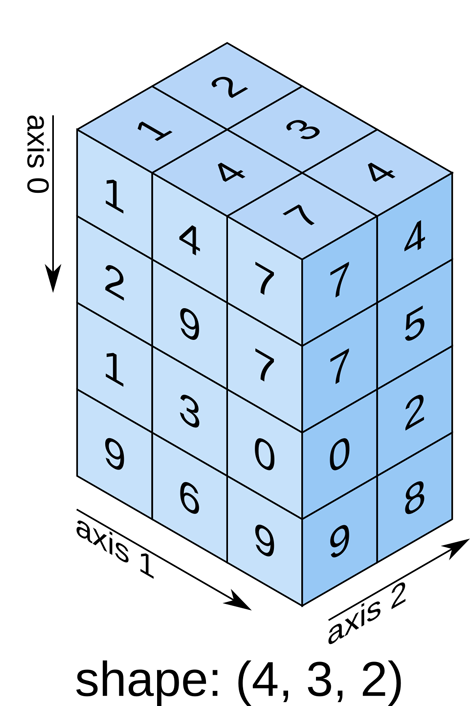

In [ ]:
three_d_array.ndim

3

In [ ]:
three_d_array.shape

(4, 3, 2)

## How to reshape an `ndarray`?

In [ ]:
two_d_array

array([[1, 2],
       [3, 4]])

In [ ]:
%%script echo Remove line for demo
one_d_array - two_d_array

Remove line for demo


Above is a stylized example, but it is often the case when working with tabular data in python you might find your data shape isn't quite right for input for a function or it doesn't match the other dataset you might want to join or compute with. This is where reshaping needs to happen.

Use the `reshape` function with the new shape as arguments. Note that the new shape must have the same number of elements as the original array.

<img src="https://numpy.org/doc/stable/_images/np_reshape.png" />

Image credit: https://numpy.org/doc/stable/user/absolute_beginners.html#transposing-and-reshaping-a-matrix

In [ ]:
one_d_array.reshape(2, 2) - two_d_array

array([[-1, -1],
       [-1, -1]])

To flatten any multidimensional array to a 1-d array:

In [ ]:
two_d_array.flatten()

array([1, 2, 3, 4])

In [ ]:
one_d_array - two_d_array.flatten()

array([-1, -1, -1, -1])

## How to transpose an ndarray?

In [ ]:
two_d_array.transpose()

array([[1, 3],
       [2, 4]])

In [ ]:
# or use short T attribute on the array
two_d_array.T

array([[1, 3],
       [2, 4]])

## How to stack and split ndarrays?

Multiple arrays can be stacked together along different axes:

In [ ]:
another_two_d_array = two_d_array * 2
print(two_d_array)
print(another_two_d_array)

[[1 2]
 [3 4]]
[[2 4]
 [6 8]]


In [ ]:
# stack row wise
vstacked = np.vstack((two_d_array, another_two_d_array))
vstacked

array([[1, 2],
       [3, 4],
       [2, 4],
       [6, 8]])

In [ ]:
# stack column wise
hstacked = np.hstack((two_d_array, another_two_d_array))
hstacked

array([[1, 2, 2, 4],
       [3, 4, 6, 8]])

An array can be split into multiple arrays, along the specified axis:

In [ ]:
vstacked

array([[1, 2],
       [3, 4],
       [2, 4],
       [6, 8]])

In [ ]:
# split to 2 arrays row wise
vsplit1, vsplit2 = np.vsplit(vstacked, 2)
print(vsplit1)
print(vsplit2)

[[1 2]
 [3 4]]
[[2 4]
 [6 8]]


In [ ]:
# split to 2 arrays column wise
hsplit1, hsplit2 = np.hsplit(vstacked, 2)
print(hsplit1)
print(hsplit2)

[[1]
 [3]
 [2]
 [6]]
[[2]
 [4]
 [4]
 [8]]


## Universal functions: `where` examples

In [ ]:
# select the indexes of elements that evaluate to true
a = np.array([1, 2, 3, 4])
np.where(a % 2) # find odd numbers

(array([0, 2]),)

In [ ]:
# select the elements that evaluate to true
np.where(a % 2, a, np.nan)

array([ 1., nan,  3., nan])

# 3.Pandas Extras

## Concatenating DataFrames

Sometimes we get datasets in batches and need to combine them into a single dataset for analysis. Pandas' `concat` is here to help!

In [ ]:
# Execute this code cell to prepare the dataset for code cells below

import pandas as pd
import numpy as np

# read and clean the monthly dataset
cars_monthly = pd.read_csv('https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Monthly_New_Car_Registrations_by_make_type.csv')
cars_monthly.dropna(subset=['number'], inplace=True)

cars_monthly_renamed = cars_monthly.rename(columns={'month': 'year_month'})
cars_monthly_renamed[['year','month']] = cars_monthly_renamed.year_month.str.split("-", expand=True)
cars_monthly_dropped = cars_monthly_renamed.drop(columns=['year_month'])

columns_ordered = ['year', 'month', 'make', 'fuel_type', 'vehicle_type', 'number']
cars_monthly_reordered = cars_monthly_dropped.reindex(columns=columns_ordered)

cars_monthly_converted = cars_monthly_reordered.astype({
    'number': 'int', 'year': 'int', 'month': 'int'})

cars_monthly_nonzero = cars_monthly_converted[cars_monthly_converted.number > 0]
cars_monthly_pivoted = cars_monthly_nonzero.pivot_table(index='make', columns='year', values='number', aggfunc='sum')
cars_monthly_melted = cars_monthly_pivoted.melt(var_name='year', value_name='number', ignore_index=False)

cars_monthly_reset = cars_monthly_melted.dropna().reset_index()

# read and clean the annual dataset
file_url = 'https://raw.githubusercontent.com/worldbank/dec-python-course/main/1-foundations/3-numpy-and-pandas/data/Singapore_Annual_New_Car_Registrations_by_make_type.csv'
singapore_cars = pd.read_csv(file_url)
singapore_cars_cleaned = singapore_cars[~np.isnan(singapore_cars.number)]
cars_annually_aggregated = singapore_cars_cleaned.pivot_table(index='make', columns='year', values='number', aggfunc='sum')
cars_annually_melted = cars_annually_aggregated.melt(var_name='year', value_name='number', ignore_index=False)
cars_annually_reset = cars_annually_melted.dropna().reset_index()

#### **Row-wise concatenation**

Let's append to the annually cars registration data with the 2022 data from the monthly dataset:

In [ ]:
cars_2022_partial = cars_monthly_reset[cars_monthly_reset.year == 2022]
cars_annual_with_2022 = pd.concat([cars_annually_reset, cars_2022_partial], ignore_index=True)
cars_annual_with_2022

,make,year,number
0,ALFA ROMEO,2015,31.0
1,ALPINA,2015,9.0
2,ASTON MARTIN,2015,5.0
3,AUDI,2015,2093.0
4,AUSTIN,2015,2.0
...,...,...,...
418,TESLA,2022,315.0
419,TOYOTA,2022,3545.0
420,TRIUMPH,2022,2.0
421,VOLKSWAGEN,2022,241.0


In [ ]:
cars_annual_with_2022.year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

#### **Column-wise concatenation**

If batches of data are split column wise, we can specify `axis=1` for column-wise concatenation. 

To demonstrate this, let's first create a DataFrame with a `final` column to indicate if the data is finalized. It would be false for all 2022 data:

In [ ]:
finalized = cars_annual_with_2022.year != 2022
cars_annual_finalized = pd.DataFrame({'final': finalized})
cars_annual_finalized

,final
0,True
1,True
2,True
3,True
4,True
...,...
418,False
419,False
420,False
421,False


To perform column-wise concatenation:

In [ ]:
pd.concat([cars_annual_with_2022, cars_annual_finalized], axis=1)

,make,year,number,final
0,ALFA ROMEO,2015,31.0,True
1,ALPINA,2015,9.0,True
2,ASTON MARTIN,2015,5.0,True
3,AUDI,2015,2093.0,True
4,AUSTIN,2015,2.0,True
...,...,...,...,...
418,TESLA,2022,315.0,False
419,TOYOTA,2022,3545.0,False
420,TRIUMPH,2022,2.0,False
421,VOLKSWAGEN,2022,241.0,False


`merge` and `concat` are two very powerful function for working with multiple DataFrames. Check out their documentation and Pandas' user guide on [Merge, join, concatenate and compare](https://pandas.pydata.org/docs/user_guide/merging.html) to learn more. 

**Tip**: you can always invoke `?` to bring up the documentation for any function in colab, e.g. `pd.concat?`